In [213]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import pandas as pd
import seaborn as sns
import my_functions_v13 as my
import importlib
from scipy.stats import describe


importlib.reload(my)

<module 'my_functions_v13' from '/Users/lucasumann/PycharmProjects/Masterarbeit/Notebooks/my_functions_v13.py'>

In [2]:
window_size_training = 0.1

In [3]:
number_factors = 3

In [4]:
full_coins_model = my.cond_auto_model(full_input = True, parallel_runs = 2, factor_dim=number_factors, model_name = "322 coins with intercept v13 training window "+str(window_size_training))
full_coins_model.test_percent = 1 - window_size_training

In [5]:
full_coins_model.initialize_X_Y()

In [78]:
characteristics = full_coins_model.variables_df_list_unstandardized

In [227]:
covariates_all = pd.concat([characteristics[i] for i in np.arange(len(characteristics))])
covariates_all.columns = ["new addresses", "active addresses", "bm", "volume", "sd. volume", "size", "illiq", "capm beta", "max", "capm alpha", "ivol", "turnover", "rvol", "bid-ask", "detrend. turnover", "sd. turnover", "rel to high", "volume shock 30", "volume shock 60", r"r2_1", r"r7_2", r"r13_2", r"r22_2", r"r31_2", r"r30_14", r"r180_60", r"VaR 5%"]

In [84]:
for col in covariates_all.columns:
    covariates_all.loc[:, col] = np.array(winsorize(covariates_all.loc[:, col], limits = [0.05, 0.05], nan_policy="omit"))

In [122]:
descriptive_statistics = {}
for col in covariates_all.columns:
    statistics = {}
    description = describe(covariates_all[col], nan_policy = "omit")
    statistics["Minimum"] = float(description[1][0])
    statistics["Maximum"] = float(description[1][1])
    statistics["Mean"] = description[2]
    statistics["Variance"] = description[3]
    statistics["Skewness"] = float(description[4])
    statistics["Kurtosis"] = description[5]
    descriptive_statistics[col] = statistics


In [206]:
stats_df = pd.DataFrame(descriptive_statistics).T

In [207]:
for i in np.arange(len(stats_df)):
    for j in np.arange(len(stats_df.columns)):
        if np.abs(stats_df.iloc[i, j]) == 0:
            stats_df.iloc[i, j] = '{:.0f}'.format(stats_df.iloc[i, j])
        elif np.abs(stats_df.iloc[i, j]) < 1000:
            stats_df.iloc[i, j] = '{:.4f}'.format(stats_df.iloc[i, j])
        else:
            stats_df.iloc[i, j] = '{:.1e}'.format(stats_df.iloc[i, j])

In [208]:
for i in np.arange(len(stats_df)):
    for j in np.arange(len(stats_df.columns)):
        stats_df.iloc[i, j] = r'\num{' + stats_df.iloc[i, j] + r'}'

In [209]:
stats_df.index = ["new addresses", "active addresses", "bm", "volume", "standard deviation volume", "size", "illiq", "capm beta", "max", "capm alpha", "ivol", "turnover", "rvol", "bid-ask", "detrended turnover", "standard deviation turnover", "rel to high", "volume shock 30", "volume shock 60", r"r2\_1", r"r7\_2", r"r13\_2", r"r22\_2", r"r31\_2", r"r30\_14", r"r180\_60", r"VaR 5\%"]

In [210]:
print(stats_df.to_latex(escape = False))

\begin{tabular}{lllllll}
\toprule
{} &         Minimum &         Maximum &           Mean &       Variance &        Skewness &        Kurtosis \\
\midrule
new addresses               &         \num{0} &   \num{1.0e+06} &  \num{2.9e+03} &  \num{7.9e+08} &   \num{14.4108} &  \num{237.7902} \\
active addresses            &         \num{0} &   \num{4.7e+06} &  \num{6.4e+03} &  \num{3.6e+09} &   \num{13.8191} &  \num{262.9238} \\
bm                          &    \num{0.0001} &   \num{2.6e+09} &  \num{2.2e+05} &  \num{5.1e+14} &  \num{109.4618} &   \num{1.2e+04} \\
volume                      &         \num{0} &   \num{1.9e+21} &  \num{9.3e+15} &  \num{1.4e+37} &  \num{426.0003} &   \num{1.9e+05} \\
standard deviation volume   &         \num{0} &   \num{3.4e+20} &  \num{5.0e+16} &  \num{1.4e+37} &   \num{77.7582} &   \num{6.3e+03} \\
size                        &         \num{0} &   \num{1.3e+12} &  \num{1.8e+09} &  \num{8.9e+20} &   \num{27.0693} &  \num{834.9976} \\
illiq                  

/var/folders/13/d37n485s17n292n_3yvvjbw00000gn/T/ipykernel_6692/3862219074.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stats_df.to_latex(escape = False))


In [200]:
stats_df

,Minimum,Maximum,Mean,Variance,Skewness,Kurtosis
new_addresses,$\num{0}$,$\num{1.0e+06}$,$\num{2.9e+03}$,$\num{7.9e+08}$,$\num{14.4108}$,$\num{237.7902}$
active_addresses,$\num{0}$,$\num{4.7e+06}$,$\num{6.4e+03}$,$\num{3.6e+09}$,$\num{13.8191}$,$\num{262.9238}$
bm,$\num{0.0001}$,$\num{2.6e+09}$,$\num{2.2e+05}$,$\num{5.1e+14}$,$\num{109.4618}$,$\num{1.2e+04}$
volume,$\num{0}$,$\num{1.9e+21}$,$\num{9.3e+15}$,$\num{1.4e+37}$,$\num{426.0003}$,$\num{1.9e+05}$
standard deviation volume,$\num{0}$,$\num{3.4e+20}$,$\num{5.0e+16}$,$\num{1.4e+37}$,$\num{77.7582}$,$\num{6.3e+03}$
size,$\num{0}$,$\num{1.3e+12}$,$\num{1.8e+09}$,$\num{8.9e+20}$,$\num{27.0693}$,$\num{834.9976}$
illiq,$\num{-0.0361}$,$\num{17.2750}$,$\num{-0.0039}$,$\num{0.0017}$,$\num{356.9986}$,$\num{1.4e+05}$
capm beta,$\num{-0.4129}$,$\num{5.2e+09}$,$\num{1.9e+05}$,$\num{7.0e+14}$,$\num{156.5901}$,$\num{2.6e+04}$
max,$\num{0}$,$\num{1.1e+10}$,$\num{1.9e+06}$,$\num{1.9e+16}$,$\num{73.5529}$,$\num{5.4e+03}$
capm alpha,$\num{-0.0248}$,$\num{4.1e+08}$,$\num{6.6e+04}$,$\num{2.3e+13}$,$\num{72.9906}$,$\num{5.4e+03}$


# Plot Correlation Matrix

In [228]:
corr = covariates_all.corr()

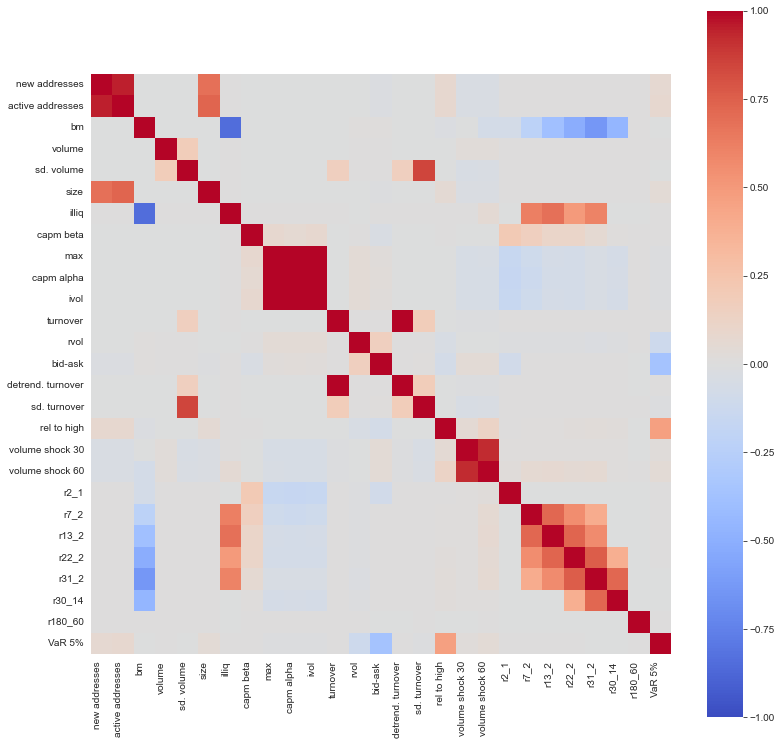

In [230]:
fig, ax = plt.subplots(figsize = [13, 13])
sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    square=True,
    cmap = "coolwarm",
    ax = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.savefig("../Plots/Correlation heatmap characteristics.png", transparent = True, dpi = 600)